**Import libaries**

In [217]:
#plan

#oop nn, ie has classes 

# get the predicted values stored somewhere

#import libraries 

import numpy as np
import random
import matplotlib.pyplot as plt
import time

Implement the base layer class

In [218]:
#the abstract base layer class

# rename? 

class Layer:
  def __init__(base):           #constructor
    base.input = None           # change to array? 
    base.output = None 

  def forward(base, input):
    raise NotImplementedError

  def backward(base, outputGrad, learnRate):
    raise NotImplementedError

Implement dense layer


explain  the maths (derivatives)

In [219]:
# rename

class Dense(Layer):
  def __init__(base, inputSize, outputSize):          # constructor with number of input neurons and number of output neurons 
    #base.inputSize = inputSize
    #base.outputSize = outputSize
    base.weights = np.random.rand(inputSize, outputSize) - 0.5        # create a 2D array with random values between -0.5 and 0.5 for the initial weights for the layer 
    base.bias = np.random.rand(1, outputSize) - 0.5                   # create a vector with random values between -0.5 and 0.5 for the initial biases for the layer
    #Layer.__init__(base)

  def forward(base, input_data):                                      # forward propagation 
    base.input = input_data                                           # store input data
    base.output = np.dot(base.input, base.weights) + base.bias        # calculate z 
    #print("Weights size is ", base.weights.shape)
    #print("Bias size is ", base.bias.shape)
    #print("Input size is ", base.input.shape)
    #print("Output size is ", base.output.shape)
    #print("forward pass - dense")
    #print(base.output)
    return base.output                                                # return z as the ouput for this layer 

#  def backward(base, outputGrad, learnRate):
#    weightGrad = np.dot(outputGrad, base.input.T)
#    base.weights -= learnRate*weightGrad
#    base.bias -= learnRate*outputGrad
#    return np.dot(base.weights.T, outputGrad)

  def backward(self, outputGrad, learning_rate):                      # backward propagation 
    input_error = np.dot(outputGrad, self.weights.T)                  # calculate the derivative of the error wrt the inputs 
    weights_error = np.dot(self.input.T, outputGrad)                  # calculate the derivative of the error wrt the weights
    bias_error = outputGrad                                           # the derivative of the error wrt the bias is the same as the derivative of the error wrt to the output 

    # update parameters
    self.weights = self.weights - learning_rate * weights_error       # updates the weights 
    self.bias = self.bias - learning_rate * bias_error                # updates the bias
    ##print("backwards pass - dense")
    return input_error                                                # returns the derivative of the error wrt the inputs for the derivative of the activation function 
  

Implement activation layer

In [220]:
class Activation(Layer):
  def __init__(base, activationFn, activationFnDerv):
    base.activationFn = activationFn                            # the activation function provided for forward propagation 
    base.activationFnDerv = activationFnDerv                    # the derivative of the activation function for backpropagation 

  def forward(base, input):
    base.input = input                                          # gets z from the previous layer 
    #print("Output in forward pass - act")
    #print("z for act is ", base.input)
    base.output = base.activationFn(base.input)                 # passes z to the activation function
    ##print("forward pass - act")
    #print("act returns is ", base.output)
    return base.output                                          # returns the outputs of the forward propagation 
  
  def backward(base, outputGrad, learnRate):
    #TODO
    ##print("backwards pass - act")
    return base.activationFnDerv(base.input) * outputGrad       # returns the result of the derivative of the activation function 


Activation Functions

In [221]:
#class Tanh(Activation):
#  def __init__(base):
#    tanh = lambda x: np.tanh(x)
#    tanhDerv = lambda x: 1 - np.tanh(x)**2
#    super().__init__(tanh, tanhDerv)


# the hyperbolic tangent activation function for forward propagation 
def tanh(z):
  ##print("act func")
  #print("input - act ", z)
  z = z.astype(float)
  #r = np.zeros([1,len(z[0])])
  #for i in range(len(z[0])):
  #  r[0][i] = np.tanh(z[0][i])
  #print("r is ", r)
  #print("returned from act ", np.tanh(z))
  return np.tanh(z)

# the hyperbolic tangent activation function for backward propagation 
def tanhDerv(x):
  ##print("act func derv")
  x = x.astype(float)
  return 1 - np.tanh(x)**2

def relu(z):
  for i in range(len(z[0])):
    z[0][i] = np.maximum(0,z[0][i])
  return z

def reluDerv(z):
  #print("Shape of input - act ", z.shape)
  r = np.zeros([1,len(z[0])])
  for i in range(len(z[0])):
    if(z[0][i]<0):
      r[0][i] = 0
      #return 0
    else: 
      r[0][i] = 1
      #return 1
  #print("Shape of output - act ", r.shape)
  return r

def Logistic(x):
  x=x.astype(float)
  #print("Act returns ", 1/(1+np.exp(-x)))
  return 1/(1+np.exp(-x))

def LogisticDerv(x):
  x=x.astype(float)
  #print("act derv gets ", x)
  #print("Act derv returns ",(-np.exp(-x)/((1+np.exp(-x))**2)))
  #print("or it could return ", Logistic(x)*(1-Logistic(x)))
  #Logistic(x)*(1-Logistic(x))

  return Logistic(x)*(1-Logistic(x)) #(-np.exp(-x)/((1+np.exp(-x))**2))




Loss Functions

In [222]:
def mse(yExpect, yPred):
  ##print("loss func")
  return np.mean(np.power(yExpect - yPred, 2))

def mseDerv(yExpect, yPred):
  ##print("loss func derv")
  return 2*(yPred - yExpect)/yExpect.size

def crossEn(yExpect, yPred):
  return -(yExpect*np.log(yPred)+(1-yExpect)*np.log(1-yPred))

def crossEnDerv(yExpect, yPred):
  return -(yExpect/yPred)+((1-yExpect)/(1-yPred))



Nextwork class

In [223]:
# want to return an array of predicted outputs - NOT a list!

class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
                              ##print("predict")
        samples = len(input_data)                             # predicts an output for every row in the data 
                              #print("size of input datd is ", len(input_data), len(input_data[0]), len(input_data[0][0]))
        result = []
                              #result2 = np.zeros(len(input_data))                                           # initialise array to store the predicted results 
                              #print(result2)
                              # run network over all samples
        for i in range(samples):                              # for each row in the data 
                            # forward propagation
                            #output = np.zeros([len(input_data[0]), samples], dtype = int)
                            #input = input_data[i]                            # get 
                            #print("All input for predict ", input_data)
                            #print("Input for predict ", input_data[i])
                            #print("Input length ", len(input_data[i]))
                            #print("Input length x2 ", len(input_data[i][0]))
            output = input_data[i]
                            #print("len output as input - initial", len(output))
                            #output = np.zeros(len(input_data[i][0]))
                            #output = np.zeros([len(input_data[i]), len(input_data[i][0])])
                            #print("TEST 1 ", input)
                            #print("TEST 2 ", input[0])
                            #print("TEST 3 ", input[0][0])
                            
            for layer in self.layers:
                            
              output = layer.forward(output)
                ##
                            #print("len output as output", len(output))
                            #print("output ", output)
                            #bob = output.reshape(1)
                            #print("output reshape ", bob)
                            #result2[i] = bob
            result.append(output)
                            #print("output[0][0] is ", output[0][0])
                            #result2[0][i] = output[0][0]
                            #print("i", i)
                            ##
                            #print("result - predict ", result)
                            #print("result2 - predict ", result2)
                            ##print("result 2 - predict ", result)
                            #print("result at pos 0 ", result[0])
                            #print("result 2 at pos 0 ", result2[0][0])
        return result #, result2

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        ##
        #print("fit")
        samples = len(x_train)
        errorStore = np.zeros(epochs)
        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                  ##
                  #print("print output - train", output)
                  output = layer.forward(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward(error, learning_rate)

            # calculate average error on all samples
            err /= samples
            errorStore[i] = err
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))
        return errorStore

**Data stuff**

# Data manipulation 

In [224]:
import sys
assert sys.version_info >= (3, 5)
import numpy as np
import pandas as pd
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import io
from google.colab import files
uploaded = files.upload()     #upload the wdbc dataset

Saving wdbc.data to wdbc (7).data


In [225]:
data = pd.read_csv(io.BytesIO(uploaded['wdbc.data']))
print(data)
data.head()

     ID_Number Diagnosis  Radius1  Texture1  Perimeter1   Area1  Smoothness1  \
0       842302         M    17.99     10.38      122.80  1001.0      0.11840   
1       842517         M    20.57     17.77      132.90  1326.0      0.08474   
2     84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3     84348301         M    11.42     20.38       77.58   386.1      0.14250   
4     84358402         M    20.29     14.34      135.10  1297.0      0.10030   
..         ...       ...      ...       ...         ...     ...          ...   
564     926424         M    21.56     22.39      142.00  1479.0      0.11100   
565     926682         M    20.13     28.25      131.20  1261.0      0.09780   
566     926954         M    16.60     28.08      108.30   858.1      0.08455   
567     927241         M    20.60     29.33      140.10  1265.0      0.11780   
568      92751         B     7.76     24.54       47.92   181.0      0.05263   

     Compactness1  Concavity1  Concave 

,ID_Number,Diagnosis,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,Concave Points1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,Concave Points3,Symmetry3,Fractal Dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [226]:
data.describe()

,ID_Number,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,Concave Points1,Symmetry1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,Concave Points3,Symmetry3,Fractal Dimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Number           569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   Radius1             569 non-null    float64
 3   Texture1            569 non-null    float64
 4   Perimeter1          569 non-null    float64
 5   Area1               569 non-null    float64
 6   Smoothness1         569 non-null    float64
 7   Compactness1        569 non-null    float64
 8   Concavity1          569 non-null    float64
 9   Concave Points1     569 non-null    float64
 10  Symmetry1           569 non-null    float64
 11  Fractal Dimension1  569 non-null    float64
 12  Radius2             569 non-null    float64
 13  Texture2            569 non-null    float64
 14  Perimeter2          569 non-null    float64
 15  Area2               569 non-null    float64
 16  Smoothne

In [228]:
data.drop('ID_Number', axis=1)

,Diagnosis,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,Concave Points1,Symmetry1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,Concave Points3,Symmetry3,Fractal Dimension3
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [229]:
#Ytest #= data["Diagnosis"] 
data["Diagnosis"] = np.where(data["Diagnosis"] == "M", 1, 0)
data["DiagnosisBinary"] = np.where(data["Diagnosis"] == 1, 0, 1)
#print(Ytest)
Y = np.array(data[["Diagnosis"]]) # X is the input data (does not include the outcome) 
YBinary = np.array(data[["DiagnosisBinary"]])
#print(temp) 

#for i in range(0, len(Y)):
#  if Y[i][0] == "M" :
#    Y[i][0] = 1
#  elif Y[i][0] == "B":
#    Y[i][0] = 0

print(Y)
print(YBinary)

X = np.array(data[["Radius1","Texture1","Perimeter1","Area1","Smoothness1","Compactness1","Concavity1","Concave Points1","Symmetry1","Fractal Dimension1","Radius2","Texture2","Perimeter2","Area2","Smoothness2","Compactness2","Concavity2","Concave Points2","Symmetry2","Fractal Dimension2","Radius3","Texture3","Perimeter3","Area3","Smoothness3","Compactness3","Concavity3","Concave Points3","Symmetry3","Fractal Dimension3"]]) # X is the input data (does not include the outcome)
print(X)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]


In [230]:
# Scale the inputs 
Xscaled = (X - np.amin(X)) / (np.amax(X) - np.amin(X))
print(Xscaled)  # Sanity check
X = Xscaled

[[4.22896098e-03 2.44005642e-03 2.88669488e-02 ... 6.23883404e-05
  1.08157029e-04 2.79501646e-05]
 [4.83544899e-03 4.17724495e-03 3.12411848e-02 ... 4.37235543e-05
  6.46450400e-05 2.09261871e-05]
 [4.62858486e-03 4.99529854e-03 3.05594734e-02 ... 5.71227080e-05
  8.49318289e-05 2.05876822e-05]
 ...
 [3.90220969e-03 6.60084626e-03 2.54583921e-02 ... 3.33333333e-05
  5.21391631e-05 1.83826986e-05]
 [4.84250118e-03 6.89468735e-03 3.29337094e-02 ... 6.22943112e-05
  9.60742830e-05 2.91490362e-05]
 [1.82416549e-03 5.76868829e-03 1.12646921e-02 ... 0.00000000e+00
  6.74894217e-05 1.65467795e-05]]


Main

# Main

In [231]:
import time

start = time.time()
print("hello")
end = time.time()
print(end - start)

hello
0.0002620220184326172


In [232]:
# DO NOT RUN - Testing python stuff 
a = np.array([[[0]], [[1]], [[1]], [[4]]])
b = a.reshape(len(a), len(a[0]))
print(a)
print(b)
np.tanh(-0.1)

[[[0]]

 [[1]]

 [[1]]

 [[4]]]
[[0]
 [1]
 [1]
 [4]]


-0.09966799462495582

In [233]:
# DO NOT RUN - Binary output stuff, not ready yet

x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]], [[1,1]]])

y_trainA = np.array([[[0]], [[1]], [[1]], [[0]], [[0]]])
y_trainB = np.array([[[1]], [[0]], [[0]], [[1]], [[1]],])

y_train = np.concatenate((y_trainA, y_trainB), axis=2)

print(y_train)

[[[0 1]]

 [[1 0]]

 [[1 0]]

 [[0 1]]

 [[0 1]]]


epoch 1/2000   error=0.277803
epoch 2/2000   error=0.271656
epoch 3/2000   error=0.267707
epoch 4/2000   error=0.265041
epoch 5/2000   error=0.263154
epoch 6/2000   error=0.261754
epoch 7/2000   error=0.260671
epoch 8/2000   error=0.259799
epoch 9/2000   error=0.259073
epoch 10/2000   error=0.258452
epoch 11/2000   error=0.257907
epoch 12/2000   error=0.257421
epoch 13/2000   error=0.256980
epoch 14/2000   error=0.256577
epoch 15/2000   error=0.256203
epoch 16/2000   error=0.255854
epoch 17/2000   error=0.255528
epoch 18/2000   error=0.255221
epoch 19/2000   error=0.254930
epoch 20/2000   error=0.254655
epoch 21/2000   error=0.254393
epoch 22/2000   error=0.254143
epoch 23/2000   error=0.253905
epoch 24/2000   error=0.253677
epoch 25/2000   error=0.253459
epoch 26/2000   error=0.253250
epoch 27/2000   error=0.253049
epoch 28/2000   error=0.252856
epoch 29/2000   error=0.252670
epoch 30/2000   error=0.252491
epoch 31/2000   error=0.252318
epoch 32/2000   error=0.252152
epoch 33/2000   e

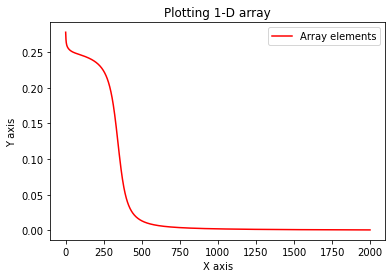

Time taken is  4.495516538619995
[array([[0.00172877]]), array([[0.95409743]]), array([[0.95656949]]), array([[0.00098194]]), array([[0.00098194]])]
pred  [0. 1. 1. 0. 0.]
expect  [0. 1. 1. 0. 0.]


In [234]:
# USES SIMPLE XOR DATA - Runs quicker if you want to see impact of different hyperparameters 

# training data
x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]], [[1,1]]])
y_train = np.array([[[0]], [[1]], [[1]], [[0]], [[0]]])
#y_trainA = np.array([[[0]], [[1]], [[1]], [[0]], [[0]]])
#y_trainB = np.array([[[1]], [[0]], [[0]], [[1]], [[1]],])

#y_train = zip(y_trainA, y_trainB)

#y_train = np.array([[[1, 0]], [[0, 1]], [[0, 1]], [[1, 0]], [[1, 0]]])

# network

startTime = time.time()

net = Network()


net.add(Dense(2, 5))
net.add(Activation(tanh, tanhDerv))
net.add(Dense(5, 15))
net.add(Activation(tanh, tanhDerv))
net.add(Dense(15, 5))
net.add(Activation(tanh, tanhDerv))
net.add(Dense(5, 1))
net.add(Activation(tanh, tanhDerv))

net.use(mse, mseDerv)
errorStore = net.fit(x_train, y_train, epochs=2000, learning_rate=0.01)
endTime = time.time()
print("last error is ", errorStore[-1])

#plot graph of error vs epochs 
xPlot = np.array(range(0, 2000))
yPlot = errorStore
plt.title("Plotting 1-D array")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(xPlot, yPlot, color = "red", label = "Array elements")
plt.legend()
plt.show()

print("Time taken is ", endTime - startTime)


#print(out)
#print(y_train.T)
out = net.predict(x_train)
print(out)
#print(out[0])

def answerFn(out):
  p = np.zeros([len(x_train)])
  for i in range(len(x_train)):
    if out[i] < 0.5:
      p[i] = 0
    else:
      p[i] = 1
  return p

pred = answerFn(out)
expt = y_train.reshape(len(y_train)) * 1.0
print("pred ", pred)
print("expect ", expt)
#res = pd.DataFrame()
#expd = y_train.reshape(len(y_train)).T
#pred = out2
##pred = np.concatenate( out, axis=0 )
##pred = np.array(pred)
##pred = np.array(out).T
#print("expected ", expd)
#print("predicted ", pred)
#res = pd.DataFrame()
#res['Predictions'] = pred
#res['Expectation'] = expd
#print(res)
#print("Accuracy: ", res.loc[res['Predictions']==res['Expectation']].shape[0] / res.shape[0] * 100)

epoch 1/2000   error=0.740737
epoch 2/2000   error=0.270780
epoch 3/2000   error=0.240665
epoch 4/2000   error=0.237436
epoch 5/2000   error=0.236856
epoch 6/2000   error=0.236702
epoch 7/2000   error=0.236633
epoch 8/2000   error=0.236583
epoch 9/2000   error=0.236537
epoch 10/2000   error=0.236493
epoch 11/2000   error=0.236450
epoch 12/2000   error=0.236407
epoch 13/2000   error=0.236365
epoch 14/2000   error=0.236324
epoch 15/2000   error=0.236283
epoch 16/2000   error=0.236242
epoch 17/2000   error=0.236201
epoch 18/2000   error=0.236161
epoch 19/2000   error=0.236122
epoch 20/2000   error=0.236082
epoch 21/2000   error=0.236043
epoch 22/2000   error=0.236004
epoch 23/2000   error=0.235966
epoch 24/2000   error=0.235927
epoch 25/2000   error=0.235889
epoch 26/2000   error=0.235851
epoch 27/2000   error=0.235754
epoch 28/2000   error=0.235418
epoch 29/2000   error=0.235000
epoch 30/2000   error=0.234587
epoch 31/2000   error=0.234210
epoch 32/2000   error=0.233866
epoch 33/2000   e

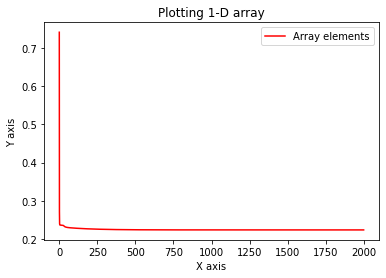

In [235]:
# USES wdbc.data

# training data
#x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]], [[1,1]]])
#print(x_train)

#y_train = np.array([[[0]], [[1]], [[1]], [[0]], [[0]]])
#y_train = np.array([[[1, 0]], [[0, 1]], [[0, 1]], [[1, 0]], [[1, 0]]])
#print(len(x_train[0][0]))
x_train = X.reshape(len(X), len(X[0]), 1)
y_train = Y.reshape(len(Y), 1)

#print(x_train)
#print("length of input 0", len(x_train))
#print("length of input 1", len(x_train[0]))
#print("length of input 2", len(x_train[0][0]))


#if len(Y) == len(X): 
#  print("lol")

#startTime = time.time()

# network
net = Network()


#net.add(Dense(2, 5))
#net.add(Activation(tanh, tanhDerv))
#net.add(Dense(5, 15))
#net.add(Activation(tanh, tanhDerv))
#net.add(Dense(15, 5))
#net.add(Activation(tanh, tanhDerv))
#net.add(Dense(5, 2))
#net.add(Activation(tanh, tanhDerv))

net.add(Dense(len(x_train[0][0]), 60))
net.add(Activation(relu, reluDerv))
net.add(Dense(60, 1))
net.add(Activation(relu, reluDerv))
#net.add(Dense(10, 1))
#net.add(Activation(tanh, tanhDerv))

# train
net.use(mse, mseDerv)
errorStore = net.fit(x_train, y_train, epochs=2000, learning_rate=0.00001)

#endTimeHere = time.time()

print("last error is ", errorStore[-1])
xPlot = np.array(range(0, 2000))
yPlot = errorStore
plt.title("Plotting 1-D array")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(xPlot, yPlot, color = "red", label = "Array elements")
plt.legend()
plt.show()
# test
#out = net.predict(x_train)

#print("Time taken is ", endTimeHere - startTime)
#print(out)
#print(y_train.T)
#out, out2 = net.predict(x_train)
#print(out[0])
#res = pd.DataFrame()
#expd = y_train.reshape(len(y_train)).T
#pred = out2
##pred = np.concatenate( out, axis=0 )
##pred = np.array(pred)
##pred = np.array(out).T
#print("expected ", expd)
#print("predicted ", pred)
#res = pd.DataFrame()
#res['Predictions'] = pred
#res['Expectation'] = expd
#print(res)
#print("Accuracy: ", res.loc[res['Predictions']==res['Expectation']].shape[0] / res.shape[0] * 100)

In [238]:
#out = net.predict(x_train)
#print("out ", out)
#print(out[0])

#def answerFn(out):
#  p = np.zeros([len(x_train)])
#  for i in range(len(x_train)):
#    if out[i] < 0.5:
#      p[i] = 0
#    else:
#      p[i] = 1
#  return p

#pred = answerFn(out)
#expt = y_train.reshape(len(y_train)) * 1.0
#print("pred ", pred)
#print("expect ", expt)

AttributeError: ignored

In [ ]:
# DO NOT RUN


# training data
#x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]], [[1,1]]])
#print(x_train)

#y_train = np.array([[[0]], [[1]], [[1]], [[0]], [[0]]])
#y_train = np.array([[[1, 0]], [[0, 1]], [[0, 1]], [[1, 0]], [[1, 0]]])
#print(len(x_train[0][0]))
x_train = X.reshape(len(X), len(X[0]), 1)
y_train = Y.reshape(len(Y), 1)

#print(x_train)
#print("length of input 0", len(x_train))
#print("length of input 1", len(x_train[0]))
#print("length of input 2", len(x_train[0][0]))


#if len(Y) == len(X): 
#  print("lol")

#startTime = time.time()

# network
net = Network()


#net.add(Dense(2, 5))
#net.add(Activation(tanh, tanhDerv))
#net.add(Dense(5, 15))
#net.add(Activation(tanh, tanhDerv))
#net.add(Dense(15, 5))
#net.add(Activation(tanh, tanhDerv))
#net.add(Dense(5, 2))
#net.add(Activation(tanh, tanhDerv))

net.add(Dense(len(x_train[0][0]), 20))
net.add(Activation(tanh, tanhDerv))
net.add(Dense(20, 1))
net.add(Activation(tanh, tanhDerv))
#net.add(Dense(10, 1))
#net.add(Activation(tanh, tanhDerv))

# train
net.use(mse, mseDerv)
errorStore = net.fit(x_train, y_train, epochs=2000, learning_rate=0.00001#)

#endTimeHere = time.time()

print("last error is ", errorStore[-1])
xPlot = np.array(range(0, 2000))
yPlot = errorStore
plt.title("Plotting 1-D array")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(xPlot, yPlot, color = "red", label = "Array elements")
plt.legend()
plt.show()
# test
#out = net.predict(x_train)

#print("Time taken is ", endTimeHere - startTime)
#print(out)
#print(y_train.T)
#out, out2 = net.predict(x_train)
#print(out[0])
#res = pd.DataFrame()
#expd = y_train.reshape(len(y_train)).T
#pred = out2
##pred = np.concatenate( out, axis=0 )
##pred = np.array(pred)
##pred = np.array(out).T
#print("expected ", expd)
#print("predicted ", pred)
#res = pd.DataFrame()
#res['Predictions'] = pred
#res['Expectation'] = expd
#print(res)
#print("Accuracy: ", res.loc[res['Predictions']==res['Expectation']].shape[0] / res.shape[0] * 100)


useful links

https://www.delftstack.com/howto/python/plot-array-python/
https://builtin.com/data-science/evaluating-classification-models
https://developers.google.com/machine-learning/crash-course/classification/accuracy
https://towardsdatascience.com/10-tips-for-a-better-google-colab-experience-33f8fe721b82
https://pythonbaba.com/python-code-to-find-2d-array-size/
https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6

In [ ]:
# DO NOT RUN

#main 

X = np.reshape([[0,0], [0,1], [1,0], [1,1]], (4,2,1))
Y = np.reshape([[0], [1], [1], [0]], (4,1,1))

NN = [
    Dense(2, 3), 
    Tanh(), 
    Dense(3,1), 
    Tanh()
]

epoch = 1000
learnRate = 0.1

#train
for e in range(epoch):
  error = 0
  for x,y in zip(X,Y):
    
    #forward
    output = x
    for layer in NN:
      output = layer.forward(output)

    #error
    error += mse(y, output)

    #backward
    grad = mseDerv(y, output)
    for layer in reversed(NN):
      grad = layer.backward(grad, learnRate)

  error /= len(x)
  print('%d/%d, error=%f' %(e+1, epoch, error))



